In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

import nurk as nurk

In [11]:
def angle(v1, v2):
    np.seterr(all='raise')
    
    v1s = np.sqrt(np.dot(v1, v1))
    v2s = np.sqrt(np.dot(v2, v2))
    
    v1 /= v1s
    v2 /= v2s
    
    dotprod = np.dot(v1, v2)
    
    if dotprod > 1.:
        return 0.
    else:
        return np.arccos(dotprod)

In [12]:
def new_points(x):
    return np.array([ 0.5*(x[0][0] + x[1][0]), x[0][1], x[1][1]])

In [13]:
def angle_points(x):
    
#    anl = 180.
#    ver1 = 180.
#    ver2 = 180.
#    ver3 = 180.
#    for p1 in x[0]:
#        for p2 in x[1]:
#            for p3 in x[2]:
#                for p4 in x[3]:
#                    for p5 in x[4]:
#                        for p6 in x[5]:
#                            new_ps = [new_points([p1,p2]),new_points([p3,p4]),new_points([p5,p6])]
#                            
#                            vects = [new_ps[1] - new_ps[0], new_ps[2] - new_ps[1], new_ps[2] - new_ps[0]]
#                            
#                            angl = angle(vects[0], vects[1])/np.pi*180
#                            
#                            if angl < anl:
#                                anl = angl
#                                ver1 = angle(np.array([-1.,0.,0.]), vects[0])/np.pi*180
#                                ver2 = angle(np.array([-1.,0.,0.]), vects[1])/np.pi*180
#                                ver3 = angle(np.array([-1.,0.,0.]), vects[2])/np.pi*180
    anl = 180.
    pc1 = x[0][0]
    pc3 = x[2][0]
    pc5 = x[4][0]
    for p1 in x[0]:
        for p3 in x[2]:
            for p5 in x[4]:
                vects = [p3 - p1, p5 - p3]
                
                angl = angle(vects[0], vects[1])/np.pi*180
                
                if angl < anl:
                    anl = angl
                    pc1 = p1
                    pc3 = p3
                    pc5 = p5
    anl = 180.
    pc2 = x[1][0]
    pc4 = x[3][0]
    pc6 = x[5][0]
    for p2 in x[1]:
        for p4 in x[3]:
            for p6 in x[5]:
                vects = [p4 - p2, p6 - p4]
                
                angl = angle(vects[0], vects[1])/np.pi*180
                
                if angl < anl:
                    anl = angl
                    pc2 = p2
                    pc4 = p4
                    pc6 = p6

    new_ps = [new_points([pc1,pc2]),new_points([pc3,pc4]),new_points([pc5,pc6])]
    
    vects = [new_ps[1] - new_ps[0], new_ps[2] - new_ps[1], new_ps[2] - new_ps[0]]
    
    angul = angle(vects[0], vects[1])/np.pi*180

    ver1 = angle(np.array([-1.,0.,0.]), vects[0])/np.pi*180
    ver2 = angle(np.array([-1.,0.,0.]), vects[1])/np.pi*180
    ver3 = angle(np.array([-1.,0.,0.]), vects[2])/np.pi*180
    
    return angul, ver1, ver2, ver3

In [6]:
with open('output_data.pkl', 'rb') as f:
    #event_points_all_df0 = pickle.load(f)
    event_points_all_df1 = pickle.load(f)
    #event_points_all_df2 = pickle.load(f)
    #event_points_all_df3 = pickle.load(f)

In [4]:
with open('output_data.pkl', 'rb') as f:
    #event_points_all_df0 = pickle.load(f)
    #event_points_all_df1 = pickle.load(f)
    event_points_all_df2 = pickle.load(f)
    #event_points_all_df3 = pickle.load(f)

In [7]:
# with open('output_data.pkl', 'rb') as f:
#      event_points_all_df0 = pickle.load(f)
# with open('output_data.pkl', 'rb') as f:
#     event_points_all_df1 = pickle.load(f)
# with open('output_data.pkl', 'rb') as f:
#     event_points_all_df2 = pickle.load(f)
# with open('output_data.pkl', 'rb') as f:
#     event_points_all_df3 = pickle.load(f)

#events_h3 = event_points_all_df0
#events_h4 = event_points_all_df1
events_h5 = event_points_all_df2
events_h6 = event_points_all_df3

In [16]:
colis = [i for i in range(0,6)]
events_h3['angle'] = events_h3[colis].apply(lambda x: angle_points(x)[2], axis = 1)
events_h4['angle'] = events_h3[colis].apply(lambda x: angle_points(x)[2], axis = 1)

In [20]:
merged_df = pd.merge(events_h3, events_h4, on='event', suffixes=('_df1', '_df2'), how='inner')
#merged_df.head()


In [21]:
# Assuming merged_df is already defined
# Example:
# merged_df = pd.DataFrame({
#     'angle_df1': [(1, 0, 0), (2, -1, 1), (3, 4, -1)],
#     'angle_df2': [(4, 0, 0), (0, -2, 1), (-3, 1, 0)]
# })

# Function to calculate the dot product of two vectors
def dot_product(vec1, vec2):
    return np.dot(vec1, vec2)

# Function to calculate the magnitude of a vector
def magnitude(vec):
    return np.linalg.norm(vec)

# Function to calculate the angle between two vectors
def angle_between_vectors(row):
    vec1 = np.array(row['angle_df1'])
    vec2 = np.array(row['angle_df2'])
    dot_prod = dot_product(vec1, vec2)
    mag_vec1 = magnitude(vec1)
    mag_vec2 = magnitude(vec2)
    cos_theta = dot_prod / (mag_vec1 * mag_vec2)
    angle_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip cos_theta to handle precision errors
    return angle_rad

# Apply the function to each row to compute the angle in radians
merged_df['angle_rad'] = merged_df.apply(angle_between_vectors, axis=1)

KeyError: 'angle_df1'

In [9]:
def voi_res(h1,h2):
    angle_res1=h1['angle resolution_df1'].values
    angle_res2=h2['angle resolution_df2'].values
    print(max(angle_res1[0]))
    x_res=[]
    y_res=[]
    indx=[]
    indy=[]
    for ind, (i, j) in enumerate(zip(angle_res1, angle_res2)):
        #x
        if not np.isnan(i[0]) and not np.isnan(j[0]):
            res=np.linalg.norm([i[0],j[0]])
            x_res.append(res*1000)
            indx.append(ind)
        #y
        if not np.isnan(i[1]) and not np.isnan(j[1]):
            res=np.linalg.norm([i[1],j[1]])
            y_res.append(res*1000)
            indy.append(ind)

    return x_res,y_res,indx,indy

In [30]:
up_down_x,up_down_y,ud_x,ud_y=voi_res(merged_df,merged_df)

nan


In [24]:
vert3_o_2Dx=abs(merged_df['vert3_o_2Dx_df1'][ud_x])
vert3_o_2Dy=abs(merged_df['vert3_o_2Dy_df1'][ud_y])


In [22]:
angle=merged_df['angle_rad'][ud_x]

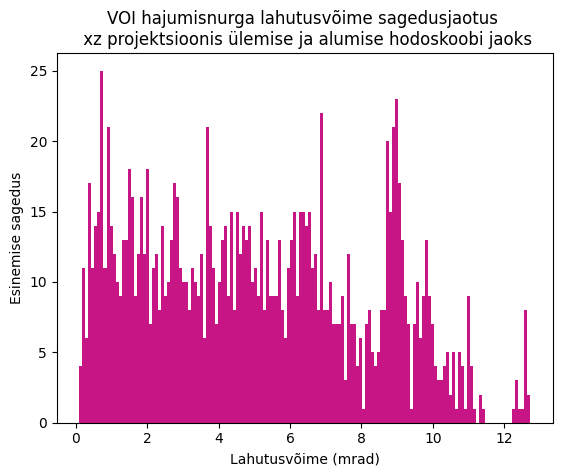

1379


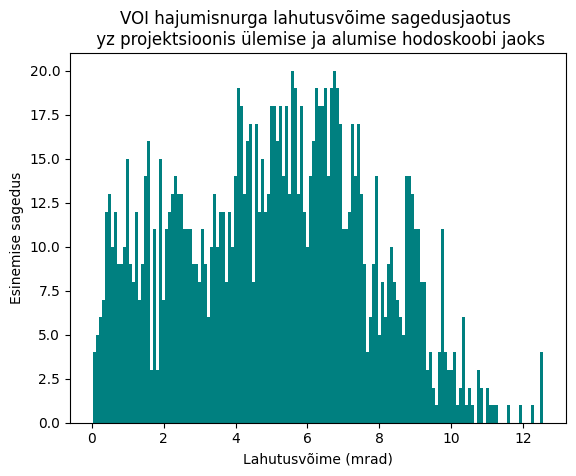

1397


In [39]:
plt.hist(up_down_x, bins = 150,color='mediumvioletred')
plt.ylabel("Esinemise sagedus")
plt.xlabel("Lahutusvõime (mrad)")
plt.title("VOI hajumisnurga lahutusvõime sagedusjaotus \n xz projektsioonis ülemise ja alumise hodoskoobi jaoks")
plt.show()
print(len(up_down_x))

plt.hist(up_down_y, bins = 150,color='teal')
plt.ylabel("Esinemise sagedus")
plt.xlabel("Lahutusvõime (mrad)")
plt.title("VOI hajumisnurga lahutusvõime sagedusjaotus \n yz projektsioonis ülemise ja alumise hodoskoobi jaoks")
plt.show()
print(len(up_down_y))

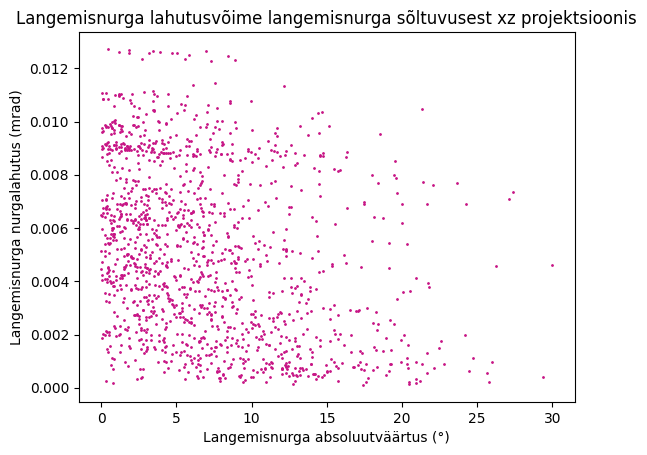

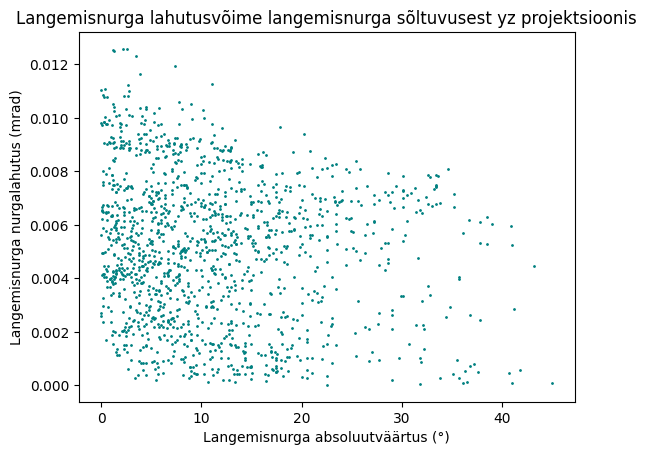

In [31]:
plt.plot(vert3_o_2Dx,up_down_x,  'mediumvioletred',marker='.',linestyle='', markersize=2)
plt.xlabel('Langemisnurga absoluutväärtus (°)')
plt.ylabel('Langemisnurga nurgalahutus (mrad)')
plt.title('Langemisnurga lahutusvõime langemisnurga sõltuvusest xz projektsioonis')
plt.grid(False)
plt.show()


plt.plot(vert3_o_2Dy,up_down_y, 'teal',marker='.',linestyle='', markersize=2)
plt.xlabel('Langemisnurga absoluutväärtus (°)')
plt.ylabel('Langemisnurga nurgalahutus (mrad)')
plt.title('Langemisnurga lahutusvõime langemisnurga sõltuvusest yz projektsioonis')
plt.grid(False)
plt.show()

In [10]:
merged_df_2 = pd.merge(events_h5, events_h6, on='event', suffixes=('_df1', '_df2'), how='inner')
#merged_df.head()

left_right_x,left_right_y,lr_x,lr_y=voi_res(merged_df_2,merged_df_2)

nan


In [12]:
vert3_o_2Dx_lr=abs(merged_df_2['vert3_o_2Dx_df1'][lr_x])
vert3_o_2Dy_lr=abs(merged_df_2['vert3_o_2Dy_df1'][lr_y])

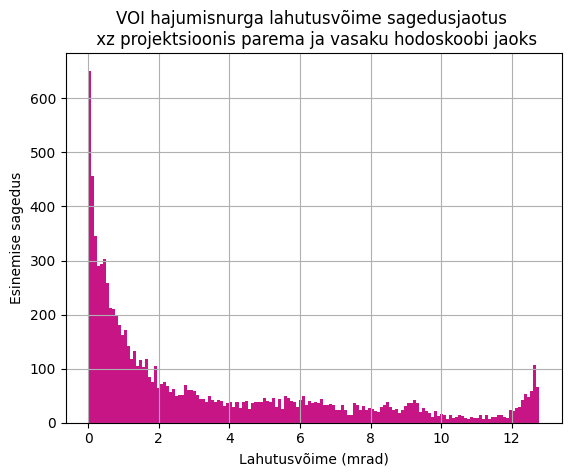

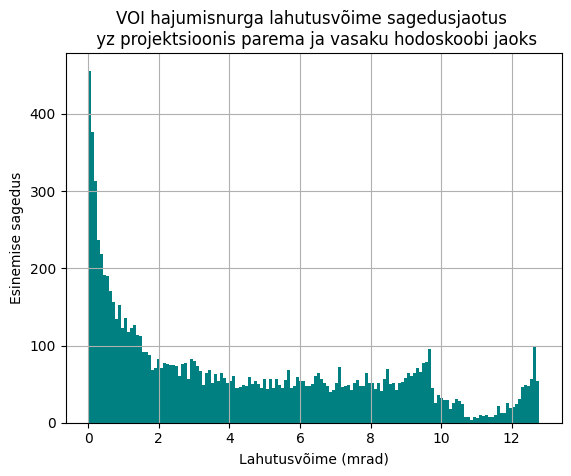

In [14]:

plt.hist(left_right_x, bins = 150,color='mediumvioletred')
plt.ylabel("Esinemise sagedus")
plt.xlabel("Lahutusvõime (mrad)")
plt.title("VOI hajumisnurga lahutusvõime sagedusjaotus \n xz projektsioonis parema ja vasaku hodoskoobi jaoks")
plt.grid()
plt.show()

plt.hist(left_right_y, bins = 150,color='teal')
plt.ylabel("Esinemise sagedus")
plt.xlabel("Lahutusvõime (mrad)")
plt.title("VOI hajumisnurga lahutusvõime sagedusjaotus \n yz projektsioonis parema ja vasaku hodoskoobi jaoks")
plt.grid()
plt.show()    

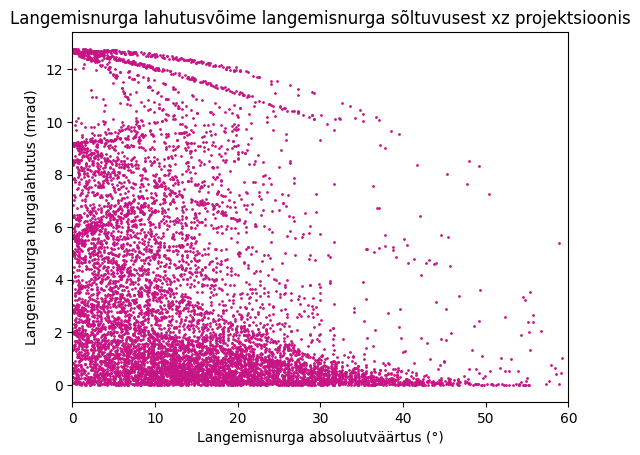

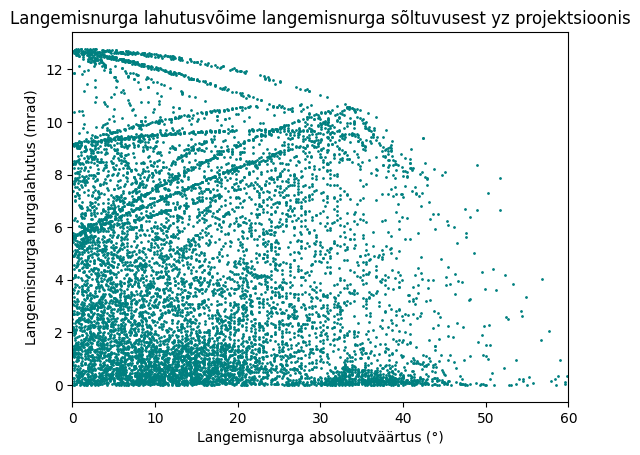

In [15]:


plt.plot(vert3_o_2Dx_lr,left_right_x,  'mediumvioletred',marker='.',linestyle='', markersize=2)
plt.xlim(0,60)
plt.xlabel('Langemisnurga absoluutväärtus (°)')
plt.ylabel('Langemisnurga nurgalahutus (mrad)')
plt.title('Langemisnurga lahutusvõime langemisnurga sõltuvusest xz projektsioonis')
plt.grid(False)
plt.show()


plt.plot(vert3_o_2Dy_lr,left_right_y, 'teal',marker='.',linestyle='', markersize=2)
plt.xlabel('Langemisnurga absoluutväärtus (°)')
plt.xlim(0,60)
plt.ylabel('Langemisnurga nurgalahutus (mrad)')
plt.title('Langemisnurga lahutusvõime langemisnurga sõltuvusest yz projektsioonis')
plt.grid(False)
plt.show()

In [9]:
def fiber_num(x):
    x=x.replace("\n","")
    #xz jaoks koordinaadid
    pc1 = np.fromstring(x[0].strip("[]"), sep=' ')
    pc3 = np.fromstring(x[2].strip('[]'), sep=' ')
    pc5 = np.fromstring(x[4].strip('[]'), sep=' ')
    pc135=np.concatenate((pc1,pc3,pc5),axis=0)
    x_sum=len(pc135)
    #yz jaoks koordinaadid
    pc2 = np.fromstring(x[1].strip('[]'), sep=' ')
    pc4=x[3].replace("\n","")
    string = pc4.replace('] [', '], [')
    # Convert the string to a 2D array
    pc4 = np.array(eval('[' + string + ']'))

    pc6 = np.fromstring(x[5].strip('[]'), sep=' ')
    pc246=np.concatenate((pc2,pc4,pc6),axis=0)
    y_sum=len(pc246)
    return x_sum, y_sum

colis1 = ['{}_{}'.format(i, 'df1') for i in range(6)]
colis2 = ['{}_{}'.format(i, 'df2') for i in range(6)]
fib1= merged_df[colis1].apply(lambda x: fiber_num(x), axis = 1)
fib2=merged_df[colis2].apply(lambda x: fiber_num(x), axis = 1)
x_fibers1 = np.array([pair[0] for pair in fib1])
x_fibers2 = np.array([pair[0] for pair in fib2])
y_fibers1=np.array([pair[1] for pair in fib1])
y_fibers2=np.array([pair[1] for pair in fib2])
x_fibers=x_fibers1+x_fibers2
y_fibers=y_fibers1+y_fibers2
x_fibers_val=[]
y_fibers_val=[]
for index, (x, y) in enumerate(zip(up_down_x, up_down_y)):
    if not np.isnan(x):
        x_fibers_val.append(x_fibers[index])
    if not np.isnan(y):
        y_fibers_val.append(y_fibers[index])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [75]:
print(min(x_fibers_val))

12
